<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entrie

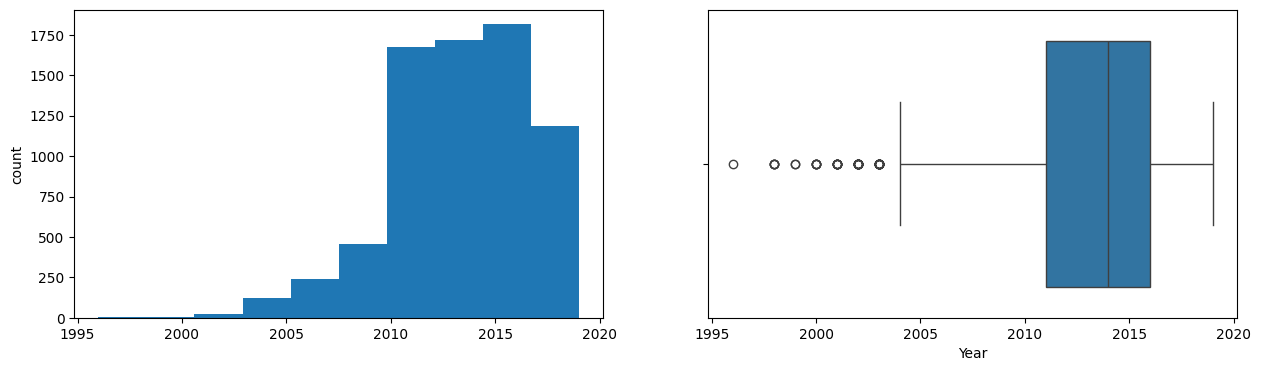

Kilometers_Driven
Skew : 61.58


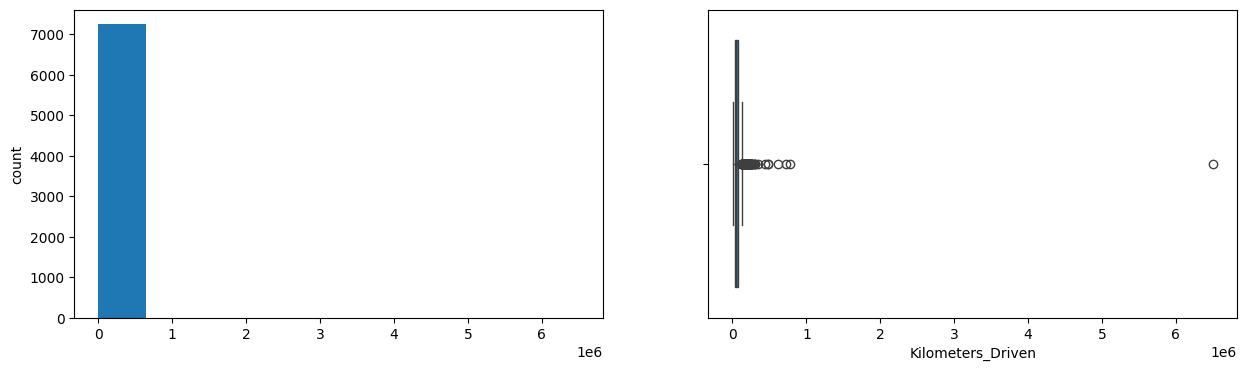

Seats
Skew : 1.9


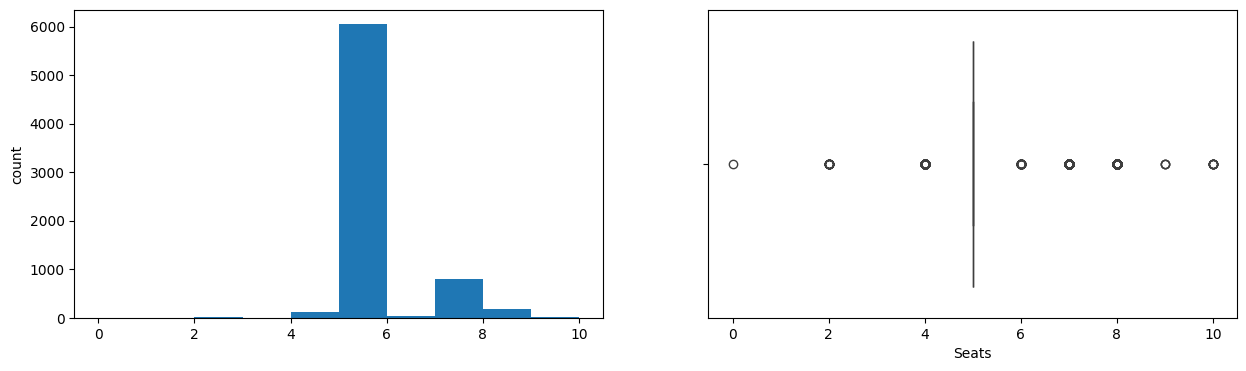

Price
Skew : 3.34


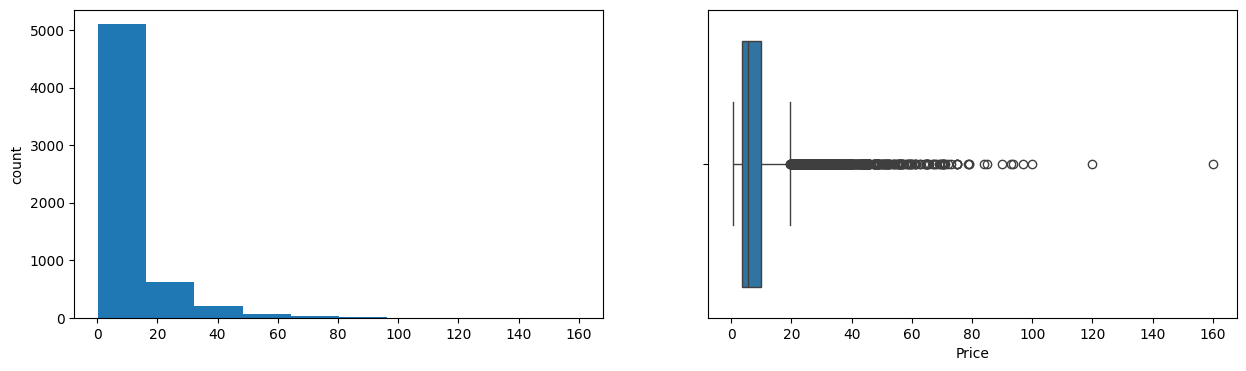

Car_Age
Skew : 0.84


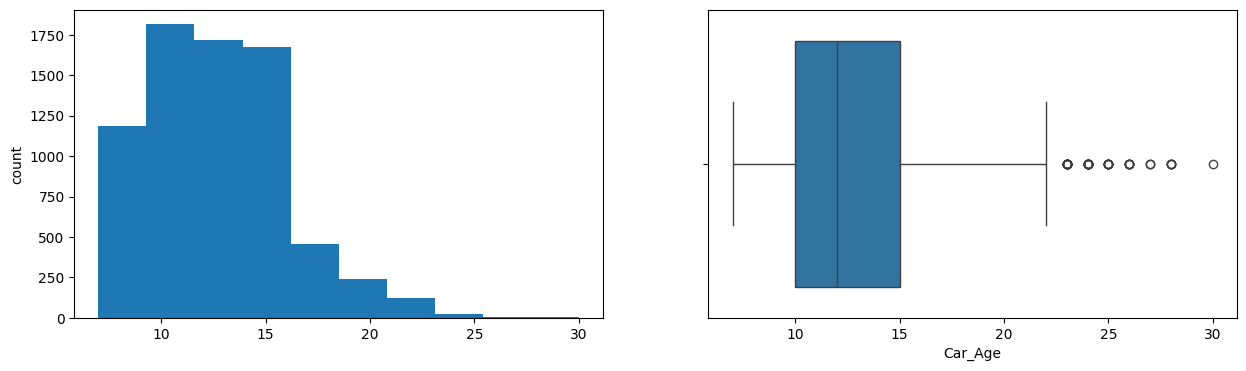

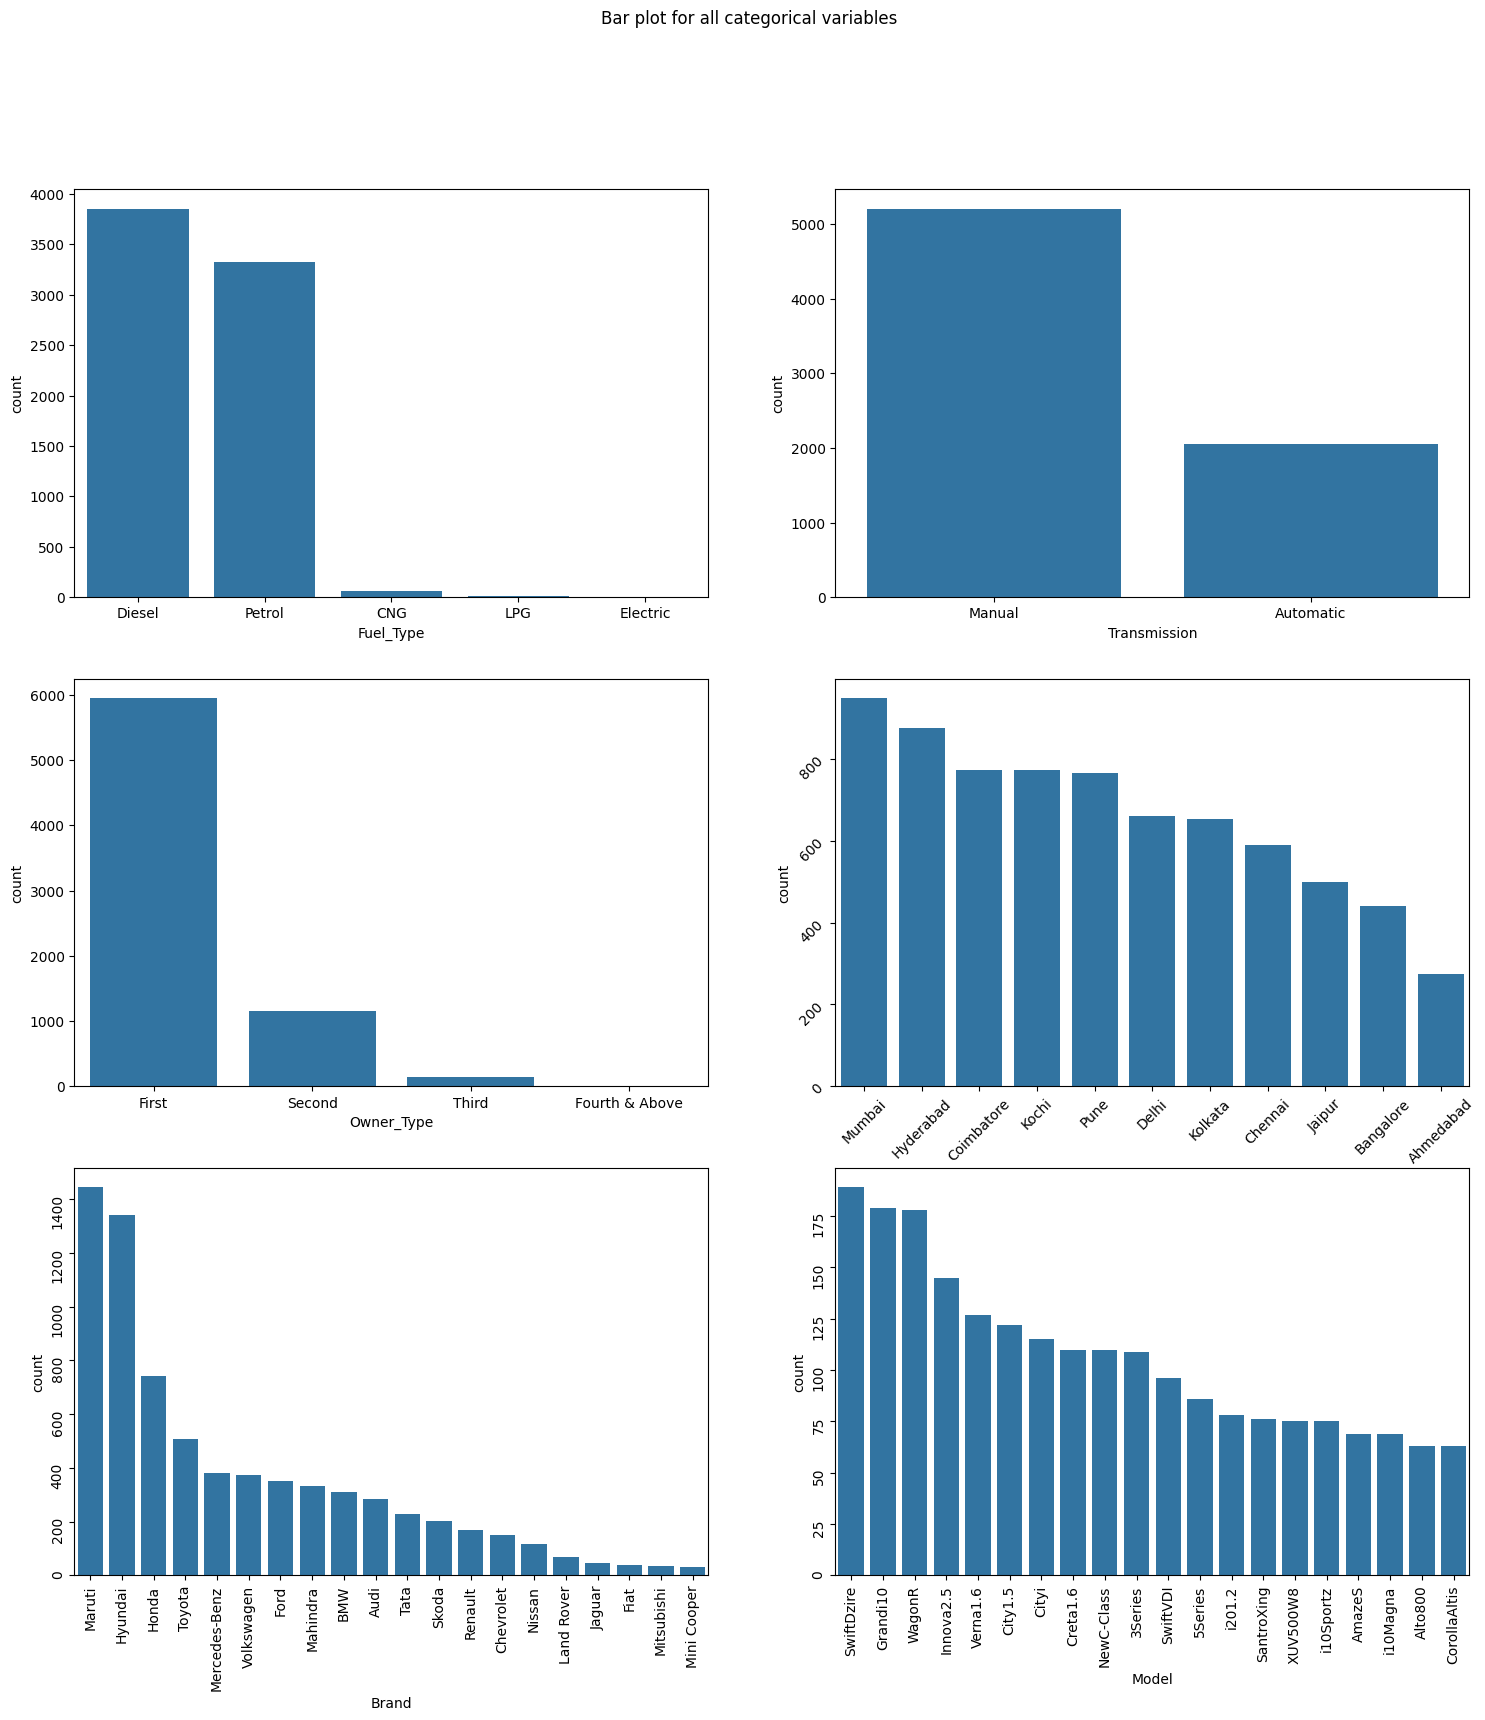

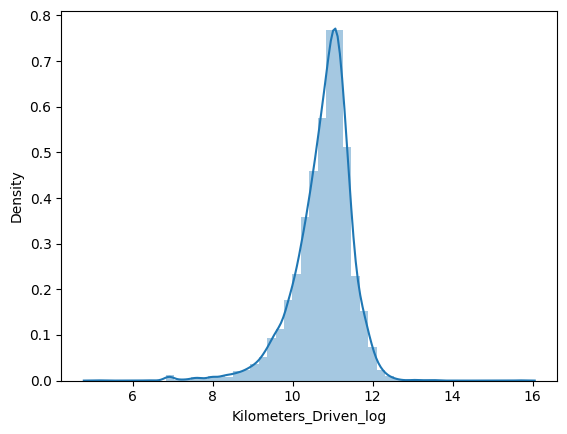

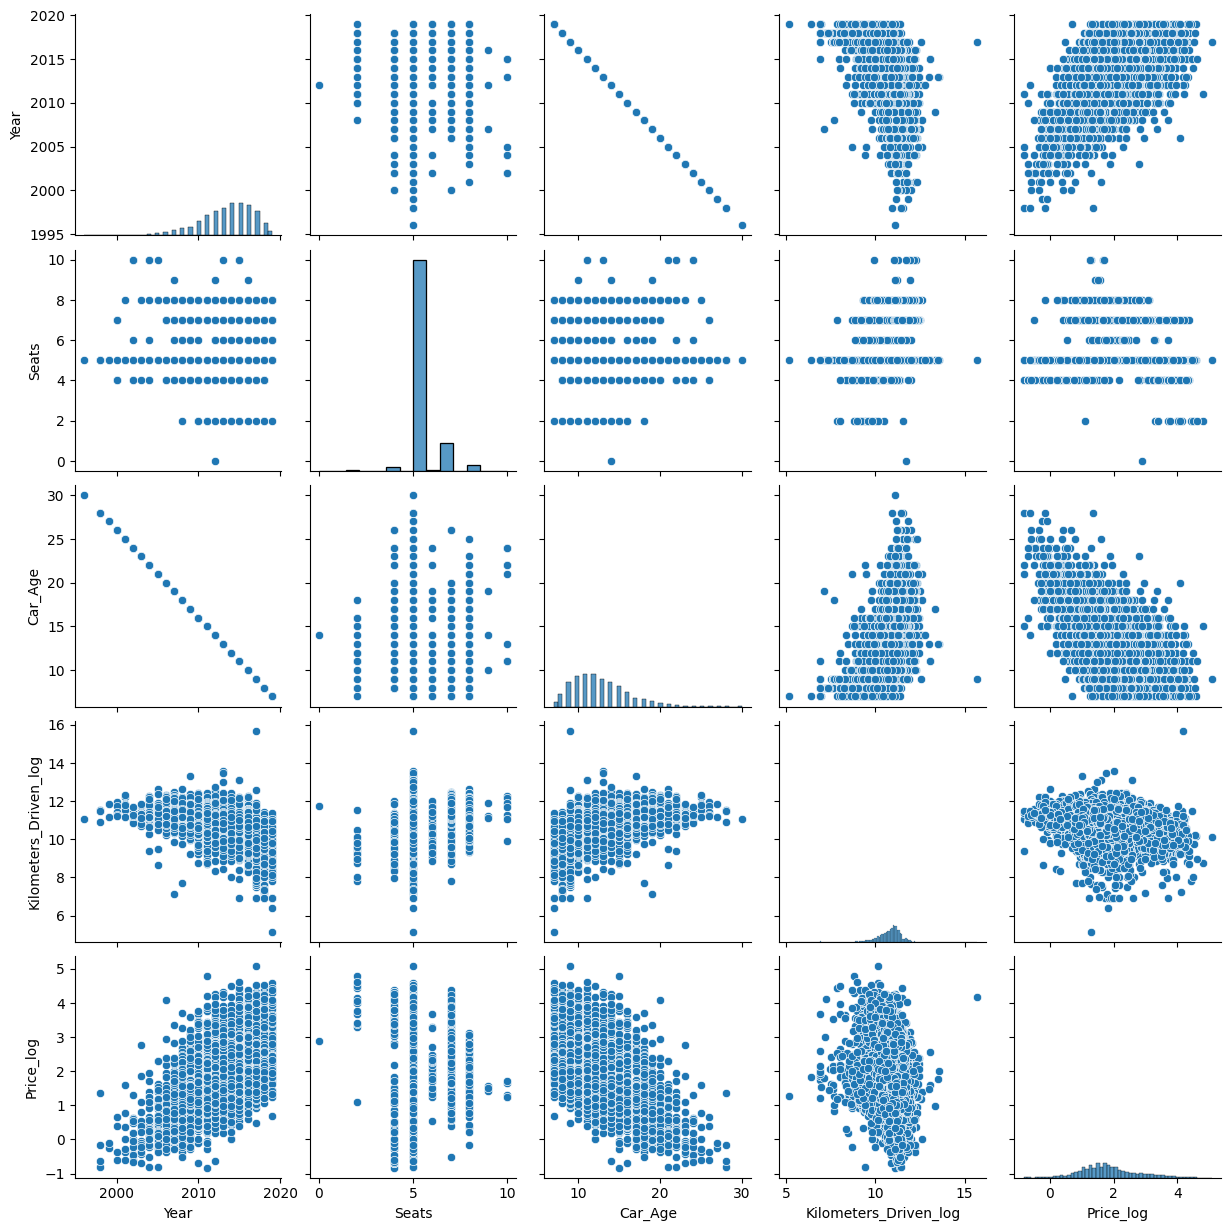

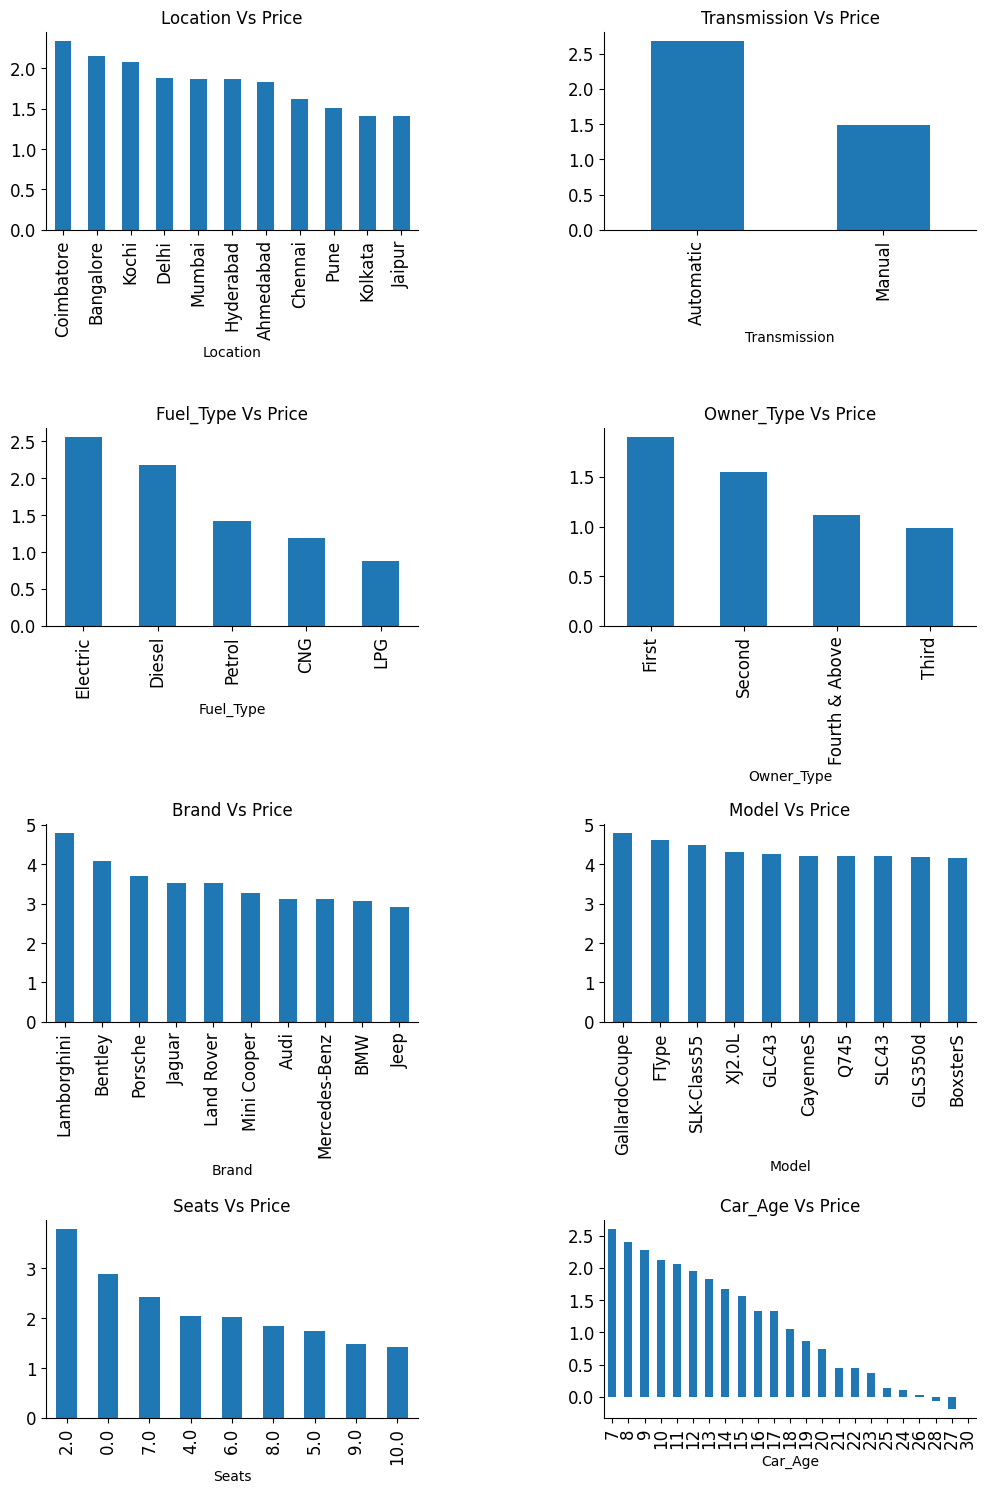

ValueError: could not convert string to float: 'Maruti Wagon R LXI CNG'

<Figure size 1200x700 with 0 Axes>

In [7]:
# ==============================================================
# USED CAR DATA ANALYSIS PROJECT  
# ==============================================================

# ---------------- STEP 1: Import Python Libraries ----------------
# pandas & numpy → data handling
# matplotlib & seaborn → visualization
# warnings → ignore unnecessary warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import date
import os

warnings.filterwarnings('ignore')

# create folder to store plot images
os.makedirs("plots", exist_ok=True)


# ---------------- STEP 2: Reading Dataset ----------------
# load dataset into dataframe
data = pd.read_csv("used_cars_data.csv")


# ---------------- STEP 3: Analyzing the Data ----------------
# view sample data and dataset structure
data.head()
data.tail()
data.info()
data.shape
data.nunique()

# check missing values count and percentage
data.isnull().sum()
(data.isnull().sum()/(len(data)))*100


# ---------------- STEP 4: Data Reduction ----------------
# remove unnecessary column S.No.
data = data.drop(['S.No.'], axis=1)
data.info()


# ---------------- STEP 5: Feature Engineering ----------------
# create new feature Car_Age using manufacturing year
data['Car_Age'] = date.today().year - data['Year']
data.head()

# extract Brand and Model from Name column
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)
data[['Name','Brand','Model']]


# ---------------- STEP 6: Data Cleaning / Wrangling ----------------
# check brand inconsistencies
print(data.Brand.unique())
print(data.Brand.nunique())

searchfor = ['Isuzu','ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

# correct incorrect brand names
data["Brand"].replace({
    "ISUZU": "Isuzu",
    "Mini": "Mini Cooper",
    "Land": "Land Rover"
}, inplace=True)


# ---------------- STEP 7: Statistical Summary ----------------
# numerical statistics summary
data.describe().T

# statistics including categorical columns
data.describe(include='all').T

# separate categorical and numerical columns
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


# ---------------- STEP 8: EDA Univariate Analysis ----------------
# visualize each numerical column using histogram and boxplot
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(),2))

    plt.figure(figsize=(15,4))

    plt.subplot(1,2,1)
    data[col].hist(grid=False)
    plt.ylabel('count')

    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])

    # save plot image
    plt.savefig(f"plots/univariate_{col}.png",
                dpi=300, bbox_inches='tight')

    plt.show()


# visualize categorical variables using count plots
fig, axes = plt.subplots(3,2, figsize=(18,18))
fig.suptitle('Bar plot for all categorical variables')

sns.countplot(ax=axes[0,0], x='Fuel_Type', data=data,
              order=data['Fuel_Type'].value_counts().index)

sns.countplot(ax=axes[0,1], x='Transmission', data=data,
              order=data['Transmission'].value_counts().index)

sns.countplot(ax=axes[1,0], x='Owner_Type', data=data,
              order=data['Owner_Type'].value_counts().index)

sns.countplot(ax=axes[1,1], x='Location', data=data,
              order=data['Location'].value_counts().index)

sns.countplot(ax=axes[2,0], x='Brand', data=data,
              order=data['Brand'].value_counts().index[:20])

sns.countplot(ax=axes[2,1], x='Model', data=data,
              order=data['Model'].value_counts().index[:20])

axes[1][1].tick_params(labelrotation=45)
axes[2][0].tick_params(labelrotation=90)
axes[2][1].tick_params(labelrotation=90)

plt.savefig("plots/categorical_countplots.png",
            dpi=300, bbox_inches='tight')

plt.show()


# ---------------- STEP 9: Data Transformation ----------------
# log transformation to reduce skewness
def log_transform(data, col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname+'_log'] = np.log(data[colname]+1)
        else:
            data[colname+'_log'] = np.log(data[colname])

log_transform(data,['Kilometers_Driven','Price'])

sns.distplot(data["Kilometers_Driven_log"],
             axlabel="Kilometers_Driven_log")

plt.savefig("plots/log_transformation.png",
            dpi=300, bbox_inches='tight')

plt.show()


# ---------------- STEP 10: EDA Bivariate Analysis ----------------
# pairplot to see relationships between variables
pair = sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
pair.savefig("plots/pairplot.png", dpi=300)
plt.show()

# relationship between categorical features and price
fig, axarr = plt.subplots(4,2, figsize=(12,18))

data.groupby('Location')['Price_log'].mean().sort_values(ascending=False)\
    .plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price")

data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False)\
    .plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price")

data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False)\
    .plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price")

data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False)\
    .plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price")

data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False)\
    .head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price")

data.groupby('Model')['Price_log'].mean().sort_values(ascending=False)\
    .head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price")

data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False)\
    .plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price")

data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False)\
    .plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price")

plt.subplots_adjust(hspace=1.0, wspace=.5)
sns.despine()

plt.savefig("plots/bivariate_analysis.png",
            dpi=300, bbox_inches='tight')

plt.show()


# ---------------- STEP 11: Multivariate Analysis ----------------
# heatmap to check correlations between variables
plt.figure(figsize=(12,7))

sns.heatmap(
    data.drop(['Kilometers_Driven','Price'],axis=1).corr(),
    annot=True,
    vmin=-1,
    vmax=1
)

plt.savefig("plots/correlation_heatmap.png",
            dpi=300, bbox_inches='tight')

plt.show()


# ---------------- STEP 12: Missing Value Imputation ----------------
# replace mileage value 0 with NaN
data.loc[data["Mileage"]==0.0,'Mileage'] = np.nan
data.Mileage.isnull().sum()

# fill mileage using mean value
data['Mileage'].fillna(value=np.mean(data['Mileage']), inplace=True)

# fill Seats, Engine and Power using Brand + Model median
data['Seats'].fillna(value=np.nan, inplace=True)

data['Seats'] = data.groupby(['Model','Brand'])['Seats']\
                    .apply(lambda x: x.fillna(x.median()))

data['Engine'] = data.groupby(['Brand','Model'])['Engine']\
                     .apply(lambda x: x.fillna(x.median()))

data['Power'] = data.groupby(['Brand','Model'])['Power']\
                    .apply(lambda x: x.fillna(x.median()))